In [1]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("data/Telco_customer_churn.xlsx")

Featues Description

1. CustomerID - A unique ID that identifies each customer.

2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

3. Country: The country of the customer's primary residence.

4. State: The state of the customer's primary residence.

5. City: The city of the customer's primary residence.

6. Zip Code: The zip code of the customer's primary residence.

7. Lat Long: The combined latitude and longitude of the customer's primary residence.

8. Latitude: The latitude of the customer's primary residence.

9. Longitude: The longitude of the customer's primary residence.

10. Gender: The customer's gender: Male, Female

11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

12. Partner: Married or Single.

13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

24. Contract: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year.

25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

27. Monthly Charge: Indicates the customer's current total monthly charge for all their services from the company.

28. Total Charges: Indicates the customer's total charges, calculated to the end of the quarter.

29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

30. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

In [61]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
df['Total Charges'].dtype

dtype('O')

Total Charges has object data type. let's change it to number

In [5]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

### Check for null values

In [6]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

The Churn Reason has many missing values because not all of our customers are in the churn.

In [7]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


The total charges only has NaN when the Tenure Months is 0. That means, the customer has 0 months of usage. Therefore, NaN values in the total charges can be replaced with 0.

In [8]:
df['Total Charges'].fillna(0, inplace=True)

C:\Users\SURYA B.S\AppData\Local\Temp\ipykernel_11024\2269432574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(0, inplace=True)


## Exploratory Data Analysis

In [9]:
def countplot_and_pie_chart(col):
    plt.figure(figsize=(20, 8))

    # Creating subplots
    plt.subplot(1, 2, 1)
    g = sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')

    plt.subplot(1, 2, 2)
    # Filter out missing values before plotting the pie chart
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%', startangle=1407, textprops={'fontsize': 14})
    plt.axis('equal')
    plt.title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()


In [10]:
numeric_cols = list(df.select_dtypes(include=['int', 'float']))
numeric_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [11]:
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

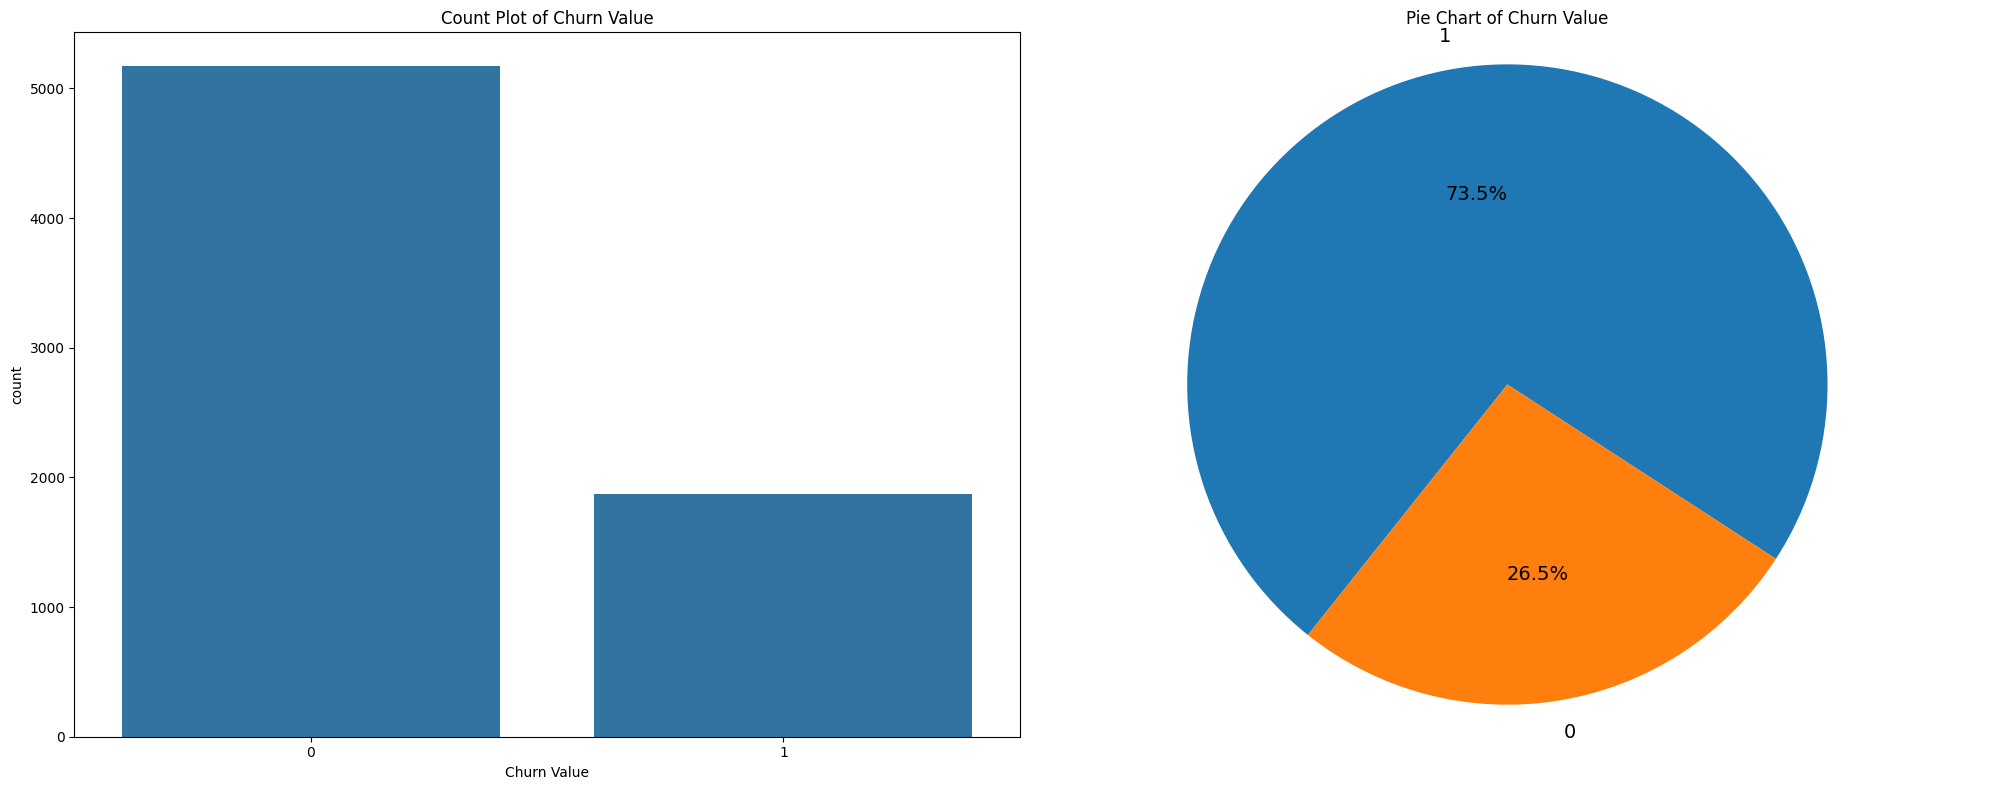

In [12]:
countplot_and_pie_chart("Churn Value")

* Among the customers in the dataset, 26.5% of customers are in churn and have stopped using the company's service

* We have significant imbalance in the dataset, but before we treat the imbalance let's explore the features

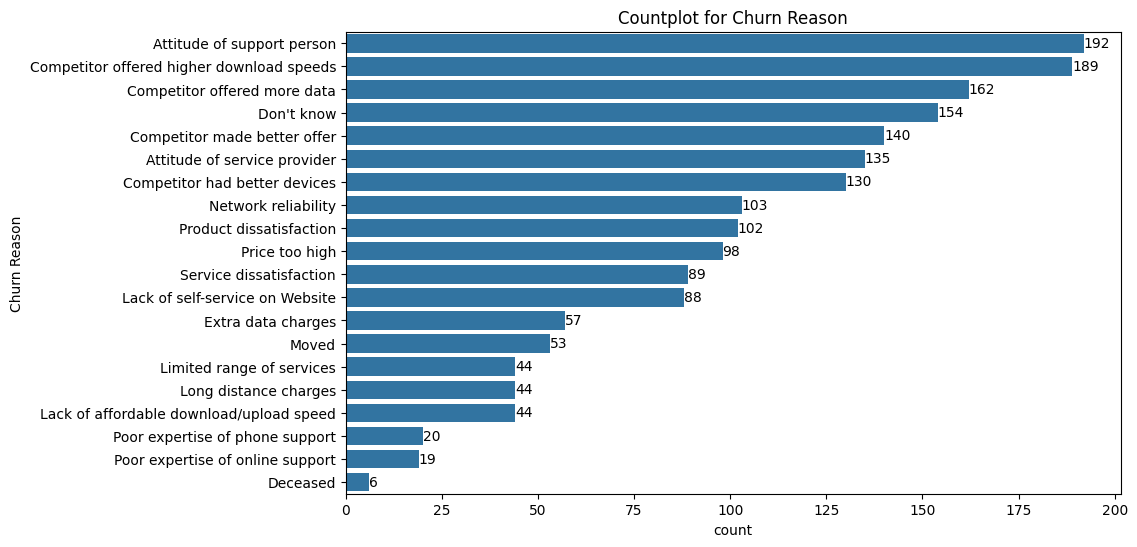

In [13]:
plt.figure(figsize=(10, 6))
g = sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
g.set_title("Countplot for Churn Reason")
for container in g.containers:
    g.bar_label(container)
plt.show()

In [14]:
reason_counts = df['Churn Reason'].value_counts().reset_index()
reason_counts.columns = ['Churn Reason', 'Count']
fig = px.pie(reason_counts, values='Count', names='Churn Reason', title='Distribution of Churn Reasons',
             width=1400, height=600)
fig.show()

* We can see that, the root causes of the churn are Attitude of the support person, Product (competitor has better product) and the price.

* Around 33.2% of churn customers have left the service because the competitor made the best offer and better products.

* 17.5% of churn customers have left the service because of the attitude of customer support



### Geography of a customer

In [15]:
df.groupby(['Country', 'State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

All of our clients are from California, USA

In [16]:
df['City'].nunique()

1129

In [17]:
coor_count = df.groupby(['Latitude', 'Longitude'])['CustomerID'].count().reset_index(name='count')


fig = px.scatter_mapbox(df.groupby(['Latitude', 'Longitude'])
['CustomerID'].count().reset_index(), lat='Latitude', lon='Longitude',
hover_data = ['CustomerID'], zoom=4 , height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [18]:
df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)

,City,CustomerID
562,Los Angeles,305
869,San Diego,150
878,San Jose,112
855,Sacramento,108
872,San Francisco,104
...,...,...
434,Hood,4
435,Hoopa,4
436,Hopland,4
437,Hornbrook,4


In [19]:
fig = px.bar(
    df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False).head(50),
    x = 'City',
    y = 'CustomerID',
    color = 'CustomerID',
    text = 'CustomerID'
)

fig.show()

### Customer's lifetime in the service

In [20]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label", marginal="box")
fig.show()

The number of clients in the churn decreases sharply after 5 months in the service

In [21]:
df.groupby('Churn Label')['Tenure Months'].quantile([.50, .75, .90, .95])

Churn Label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: Tenure Months, dtype: float64

50% of the customers who left the service had left in the first 10 months.

### Contract Types

In [22]:
fig = px.histogram(df, x='Churn Label',color="Contract", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [23]:
df.groupby(['Contract', 'Churn Label'])["CustomerID"].count().reset_index()

,Contract,Churn Label,CustomerID
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


In [24]:
fig = px.pie(
    df.groupby(['Contract', 'Churn Label'])["CustomerID"].count().reset_index(),
    values='CustomerID',
    names='Contract',
    facet_col = 'Churn Label',
    title = 'Churn rate by contract type'
)

fig.show()

* 88.6% of customers who left the service had a Month-to-Month type contract

* Maybe these people just wanted to test the service and were not satisfied

* This implies that longer type of contract people don't just leave because they paid money for long period of time (or) they liked the service and wanted to avail the service for long period of time.


In [25]:
df.groupby(['Contract', 'Churn Label'])['Tenure Months'].mean()

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.016918
One year        No             41.674063
                Yes            44.963855
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

We can see that the customers who had month-to-month contract type has the minimum life time

In [26]:
fig = px.histogram(df, x='Total Charges', color='Churn Label', marginal='box')
fig.show()

The median of charges of the churn customers are more than 2 times lower than the median charges of the customers who use the service

But this does not necessarily mean that customers who stopped using the serice were not able to pay for the service

In [27]:
fig = px.histogram(df, x='Monthly Charges', color="Churn Label", marginal='box')
fig.show()

In [28]:
df.groupby('Churn Label')['Monthly Charges'].quantile([.50, .75, .90, .95])

Churn Label      
No           0.50     64.4250
             0.75     88.4000
             0.90    103.1350
             0.95    108.4175
Yes          0.50     79.6500
             0.75     94.2000
             0.90    101.7700
             0.95    105.6100
Name: Monthly Charges, dtype: float64

The median of monthly charges of customers who have left the service are higher than those who are still active. This may be due to certain services.

#### Services prodived by the company

We have a flag for each service telling us which service the customer is using.

* Phone Service
* Internet Service
* Online Security
* Online Backup
* Device Protection
* Multiple Lines
* Tech Support
* Streaming TV
* Streaming Movies

The list is large, so let's try to prioritize by looking at which variables correlate with the churn variable.

In [29]:
df_copy = pd.get_dummies(df[['Churn Value', 'Phone Service',  'Multiple Lines', 'Internet Service',
                                      'Online Security','Online Backup', 'Device Protection',
                                      'Tech Support', 'Streaming TV', 'Streaming Movies']])
df_copy.head()

,Churn Value,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,1,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False
1,1,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
2,1,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True
3,1,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True
4,1,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True


In [30]:
df_copy = df_copy.astype(int)

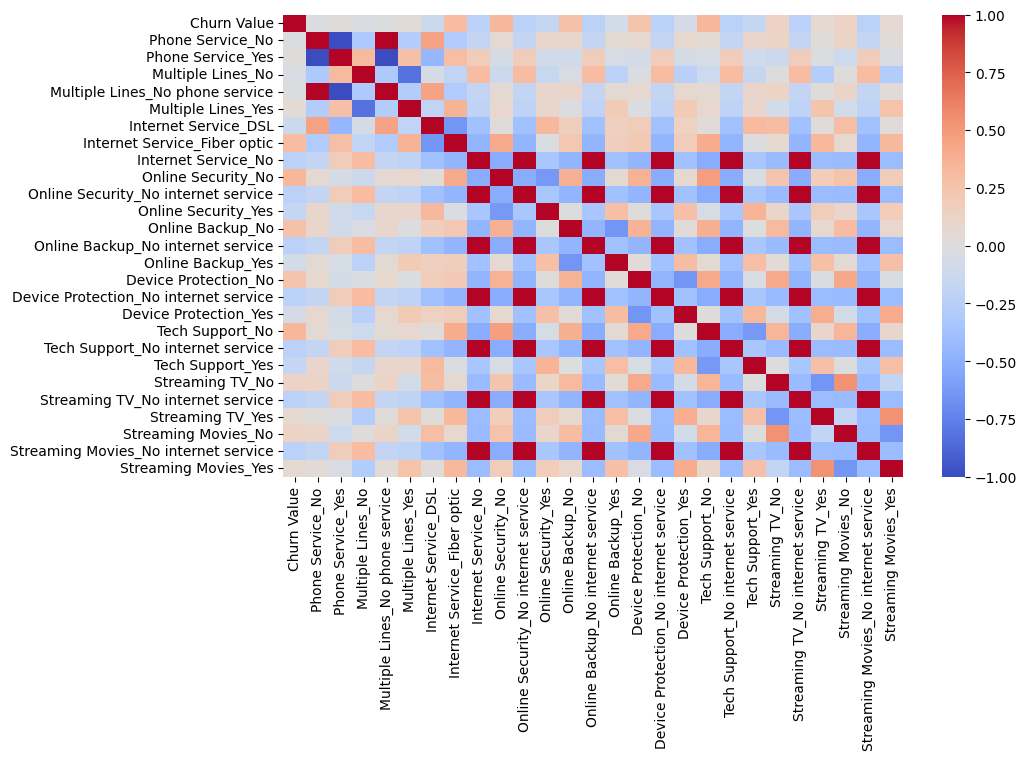

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.corr(), cmap='coolwarm')
plt.show()

In [32]:
df_copy.corr()['Churn Value'].sort_values(ascending=False)

Churn Value                              1.000000
Online Security_No                       0.342637
Tech Support_No                          0.337281
Internet Service_Fiber optic             0.308020
Online Backup_No                         0.268005
Device Protection_No                     0.252481
Streaming Movies_No                      0.130845
Streaming TV_No                          0.128916
Streaming TV_Yes                         0.063228
Streaming Movies_Yes                     0.061382
Multiple Lines_Yes                       0.040102
Phone Service_Yes                        0.011942
Phone Service_No                        -0.011942
Multiple Lines_No phone service         -0.011942
Multiple Lines_No                       -0.032569
Device Protection_Yes                   -0.066160
Online Backup_Yes                       -0.082255
Internet Service_DSL                    -0.124214
Tech Support_Yes                        -0.164674
Online Security_Yes                     -0.171226


In [33]:
fig = px.bar(df_copy.corr()['Churn Value'].sort_values(ascending=False), color='value')
fig.show()

We can see that,
* Online Security, Tech Support_No, Online Backup services has a correlation with churn value
* fiber optic internet has a correlation with churn value

In [34]:
fig = px.bar(df.groupby("Internet Service")['CustomerID'].count().reset_index(),
             x='Internet Service',
             y='CustomerID',
             color='Internet Service',
             text='CustomerID')

fig.show()

Most of the customers are using the fiber optic internet which correlates with the churn value.

In [35]:
fig = px.pie(
    df.groupby(["Internet Service","Churn Value"])['CustomerID'].count().reset_index(),
    values="CustomerID",
    facet_col="Churn Value",
    names="Internet Service",
    title="What type of internet was used by the customers who left the service"
)
fig.show()

* 69.4 % of the customers who left the service was conntect to fiber optic internet

* Fiber optic internet is better than DSL (Google it), what's wrong then

* But fiber optic internet is more expensive than DSL (Google).

* So, around 70% of the customers who left the service was using the fiber optic internet

### Tech Support

In [36]:
fig = px.bar(df.groupby(['Internet Service','Tech Support','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             text="CustomerID",
             facet_col="Tech Support",
             barmode="group"
)
fig.show()

In [37]:
fig = px.pie(df.groupby(["Tech Support", "Internet Service", "Churn Label"])["CustomerID"].count().reset_index(),
             values="CustomerID",
             facet_col="Churn Label",
             names="Tech Support",
             title="Tech Support Option and Churn")
fig.show()

77.4% of customers who left the service did not have a tech support option enabled.

### Internet Service and Online Security

In [38]:
df.groupby(['Internet Service','Online Security', 'Churn Label'])['CustomerID'].count().reset_index()

,Internet Service,Online Security,Churn Label,CustomerID
0,DSL,No,No,894
1,DSL,No,Yes,347
2,DSL,Yes,No,1068
3,DSL,Yes,Yes,112
4,Fiber optic,No,No,1143
5,Fiber optic,No,Yes,1114
6,Fiber optic,Yes,No,656
7,Fiber optic,Yes,Yes,183
8,No,No internet service,No,1413
9,No,No internet service,Yes,113


In [39]:
fig = px.bar(df.groupby(['Internet Service','Online Security', 'Churn Label'])['CustomerID'].count().reset_index(),
             x = 'Internet Service',
             y = 'CustomerID',
             color = 'Churn Label',
             text = 'CustomerID',
             facet_col = 'Online Security',
             )
fig.show()

In [40]:
fig = px.pie(df.groupby(["Online Security", "Internet Service", "Churn Label"])["CustomerID"].count().reset_index(),
             values="CustomerID",
             facet_col="Churn Label",
             names="Online Security",
             title="Online Security Option and Churn")
fig.show()

Here, Regardless of the type of internet, the percentage of churn is higher among the customers who doesn't have the online security option enables

In [41]:
fig = px.bar(df.groupby(['Internet Service','Online Backup','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             text="CustomerID",
             facet_col="Online Backup",
             barmode="group"
)
fig.show()

In [42]:
fig = px.pie(df.groupby(["Online Backup", "Internet Service", "Churn Label"])["CustomerID"].count().reset_index(),
             values="CustomerID",
             facet_col="Churn Label",
             names="Online Backup",
             title="Online Backup Option and Churn")
fig.show()

66% of customers who didn't have online backup option enabled are churn

### Customer's payment method

In [43]:
fig = px.bar(df.groupby(["Payment Method", "Churn Label"])["CustomerID"].count().reset_index(),
             y="Payment Method",
             x="CustomerID",
             color="Churn Label",
             text="CustomerID")
fig.show()

In [44]:
fig = px.pie(df.groupby(["Payment Method", "Churn Label"])['CustomerID'].count().reset_index(),
             values="CustomerID",
             names="Churn Label",
             facet_col="Payment Method",
             title="Churn rate by Customer Payment Method")
fig.show()

For customers with an electronic check as payment method, the churn rate is 45.3%

In [45]:
fig = px.bar(df.groupby(["Payment Method", "Internet Service", "Churn Label"])['CustomerID'].count().reset_index(),
             x="Payment Method",
             y="CustomerID",
             facet_col="Internet Service",
             color="Churn Label",
             text="CustomerID")
fig.show()

Among the clients with optical fibre internet, most of the clients used an electronic receipt for payment

In [46]:
import plotly.express as px

grouped_data = df.groupby(["Payment Method", "Internet Service", "Churn Label"])['CustomerID'].count().reset_index()

# Calculating churn percentages
churn_percentage = grouped_data.pivot_table(index=["Payment Method", "Internet Service"], columns="Churn Label", values="CustomerID", aggfunc="sum", fill_value=0)
churn_percentage['Total'] = churn_percentage.sum(axis=1)
churn_percentage['Churn_Percentage'] = churn_percentage['Yes'] / churn_percentage['Total'] * 100
churn_percentage.reset_index(inplace=True)

# Creating a stacked bar chart
fig = px.bar(churn_percentage,
             x="Payment Method",
             y="Churn_Percentage",
             color_discrete_map={'No': 'blue', 'Yes': 'red'},
             barmode="stack",
             facet_col="Internet Service",
             labels={"Churn_Percentage": "Churn Percentage (%)"},
             title="Churn Percentage by Payment Method and Internet Service")
fig.show()


In [47]:
churn_pm = df.assign(churn_clients = np.where(df['Churn Label'] == "Yes", df["CustomerID"], None)).groupby(
    ['Payment Method', 'Internet Service'])["churn_clients"].count().reset_index()

In [48]:
churn_pm

,Payment Method,Internet Service,churn_clients
0,Bank transfer (automatic),DSL,53
1,Bank transfer (automatic),Fiber optic,187
2,Bank transfer (automatic),No,18
3,Credit card (automatic),DSL,72
4,Credit card (automatic),Fiber optic,151
5,Credit card (automatic),No,9
6,Electronic check,DSL,207
7,Electronic check,Fiber optic,849
8,Electronic check,No,15
9,Mailed check,DSL,127


In [49]:
pm_clients = df.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()
pm_clients

,Payment Method,Internet Service,CustomerID
0,Bank transfer (automatic),DSL,566
1,Bank transfer (automatic),Fiber optic,646
2,Bank transfer (automatic),No,332
3,Credit card (automatic),DSL,594
4,Credit card (automatic),Fiber optic,597
5,Credit card (automatic),No,331
6,Electronic check,DSL,648
7,Electronic check,Fiber optic,1595
8,Electronic check,No,122
9,Mailed check,DSL,613


In [50]:
pm_data = pm_clients.join(churn_pm.set_index(['Payment Method','Internet Service']), on=["Payment Method", "Internet Service"])
pm_data

,Payment Method,Internet Service,CustomerID,churn_clients
0,Bank transfer (automatic),DSL,566,53
1,Bank transfer (automatic),Fiber optic,646,187
2,Bank transfer (automatic),No,332,18
3,Credit card (automatic),DSL,594,72
4,Credit card (automatic),Fiber optic,597,151
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,648,207
7,Electronic check,Fiber optic,1595,849
8,Electronic check,No,122,15
9,Mailed check,DSL,613,127


In [51]:
# Calculate churn rate
pm_data["Churn_rate %"] = round((pm_data["churn_clients"]/pm_data["CustomerID"]) * 100, 2)

In [52]:
fig = px.bar(pm_data.sort_values("Churn_rate %"),
             y="Churn_rate %",
             x="Payment Method",
             facet_col="Internet Service",
             color="Churn_rate %",
             text="Churn_rate %")
fig.show()

We can clearly see that,
* Churn rates are higher all payment methods where Internet service is of type fibre optic.
* The highest is for Electronic checks and mailed checks


### Gender

<Axes: xlabel='Gender', ylabel='count'>

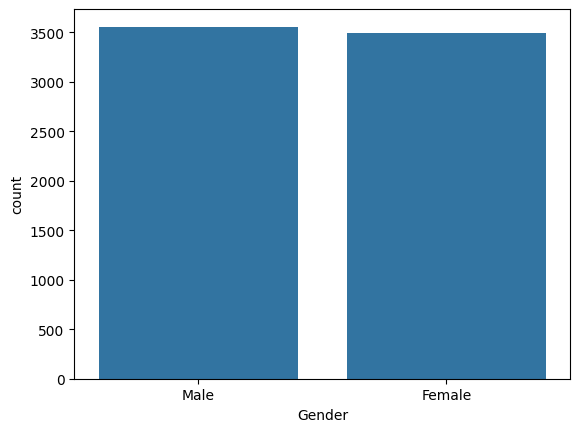

In [54]:
sns.countplot(x="Gender", data=df)

We almost have an equal number of men and women in the dataset

In [55]:
px.bar(df.groupby(["Gender", "Churn Label"])['CustomerID'].count().reset_index(),
       x="CustomerID",
       y="Gender",
       color="Churn Label",
       text="CustomerID")

### Senior citizen

In [56]:
px.pie(df.groupby(["Senior Citizen", "Churn Label"])["CustomerID"].count().reset_index(),
       values="CustomerID",
       names="Churn Label",
       facet_col="Senior Citizen",
       color="Churn Label",
       title="Churn rate by customer age")

* The churn rate among senior citizens is almost twice as high as among non-senoir citizens.
* However, there are also much fewer such customers.

In [57]:
df.groupby("Senior Citizen")["CustomerID"].count()

Senior Citizen
No     5901
Yes    1142
Name: CustomerID, dtype: int64

### Partner or Dependants

In [58]:
px.bar(df.groupby(["Senior Citizen", "Partner", "Dependents", "Churn Label"])["CustomerID"].count().reset_index(),
       x="Senior Citizen",
       y="CustomerID",
       color="Churn Label",
       facet_row="Partner",
       facet_col="Dependents")

The churn rate is high among the customers without a partner and dependants

In [59]:
px.bar(df.groupby(['Senior Citizen', 'Internet Service', 'Churn Label'])['CustomerID'].count().reset_index(),
       x="Internet Service",
       y="CustomerID",
       color="Churn Label",
       facet_col="Senior Citizen",
       barmode="group")

Among the senior Citizens, a larger percentage was connected to the optical fiber internet and the churn rate is high for these customers